## S14a: Lab 2 - Pricing, houses


### 1. Let's start by reading in our data

In [1]:
# Imports

import numpy as np
import pandas as pd

In [2]:
# Read in data with pandas

data = pd.read_csv('./data/Boston_March2018.csv')

# Preview

data.head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101


In [3]:
# View from another angle

data.iloc[100:].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
100,72253657,SLD,539000.0,530000.0,11/9/2017,3/1/2018,NaN,97,33,304 Neponset,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:--;Floor:Hardwo...,CC,Neponset,304,304,http://media.mlspin.com/photo.aspx?mls=72253657
101,72255734,SLD,829000.0,787500.0,11/15/2017,3/1/2018,NaN,20,5,73 Thaxter St,...,NaN,Foster,Hingham Middle,Hingham High,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Thaxter St,73,73,http://media.mlspin.com/photo.aspx?mls=72255734
102,72255735,SLD,1799000.0,1734300.0,11/15/2017,3/1/2018,NaN,71,71,15 Dix Street Unit 2,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Dix Street Unit 2,15,15,http://media.mlspin.com/photo.aspx?mls=72255735
103,72255807,SLD,749000.0,780000.0,11/15/2017,3/1/2018,NaN,21,6,30 Spring Lane,...,NaN,Downey,Thurston,WHS,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Spring Lane,30,30,http://media.mlspin.com/photo.aspx?mls=72255807
104,72256216,SLD,619900.0,615000.0,11/16/2017,3/1/2018,NaN,32,20,73 CIRCLE DRIVE,...,NaN,Northeast,Kennedy,Waltham,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,CIRCLE DRIVE,73,73,http://media.mlspin.com/photo.aspx?mls=72256216


### 2. Explore the data

In [4]:
# Narrow the view

prices = ['LISTPRICE', 'SOLDPRICE']
data[prices].head()

,LISTPRICE,SOLDPRICE
0,239900.0,247000.0
1,338000.0,338000.0
2,2999999.0,2950000.0
3,2600000.0,2600000.0
4,525000.0,525000.0


In [5]:
# !YOUR TURN!
# Look at sum
print(data[prices].sum())

# Look at mean
print(data[prices].mean())

LISTPRICE    2.486085e+09
SOLDPRICE    2.464492e+09
dtype: float64
LISTPRICE    480774.491561
SOLDPRICE    476598.774637
dtype: float64


In [6]:
# Let's take a look at the property types

proptypes = data.PROPTYPE.unique()
proptypes

array(['MF', 'CC', 'SF'], dtype=object)

In [7]:
# Tinker around with some filtering options

data[((data.SOLDPRICE < 1000000) | (data.SOLDDATE > "3/10/2018")) & (data.PROPTYPE == "CC")]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
21,72198564,SLD,619900.0,619900.0,6/1/2017,3/1/2018,NaN,48,44,16 Kendrick Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Kendrick Way,16,16,http://media.mlspin.com/photo.aspx?mls=72198564
22,72198880,SLD,119900.0,110000.0,7/17/2017,3/1/2018,NaN,137,118,125 Vernon St,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:--;Floor:Wood;Ap...,CC,Vernon St,125,125,http://media.mlspin.com/photo.aspx?mls=72198880
26,72204760,SLD,949900.0,930000.0,7/27/2017,3/1/2018,NaN,105,105,87 Church Street,...,NaN,NaN,NaN,NaN,"Basement:Yes;Fireplaces:1;Roof:--;Floor:Wood, ...",CC,Church Street,87,87,http://media.mlspin.com/photo.aspx?mls=72204760
27,72207032,SLD,411000.0,411000.0,8/1/2017,3/1/2018,NaN,68,54,70 Endicott Street,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:Asphalt/Fibergla...,CC,Endicott Street,70,70,http://media.mlspin.com/photo.aspx?mls=72207032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,72289323,SLD,209900.0,212000.0,3/5/2018,3/29/2018,NaN,2,2,573 Broad St,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:Laminat...,CC,Broad St,573,573,http://media.mlspin.com/photo.aspx?mls=72289323
5153,72290266,SLD,185000.0,190000.0,3/7/2018,3/30/2018,NaN,4,4,53 McCormick Ter.,...,NaN,West Elem.,ODonnell,Stoughton H. S.,"Basement:No;Fireplaces:0;Roof:--;Floor:Tile, W...",CC,McCormick Ter.,53,53,http://media.mlspin.com/photo.aspx?mls=72290266
5154,72290841,SLD,165000.0,166000.0,3/8/2018,3/30/2018,NaN,11,4,53 Fountain Ln,...,NaN,Hamilton,Chapman,Weymouth High,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,CC,Fountain Ln,53,53,http://media.mlspin.com/photo.aspx?mls=72290841
5157,72291391,SLD,399900.0,413000.0,3/9/2018,3/29/2018,NaN,11,2,16 Olde Ipswich Way,...,NaN,NaN,IMS,IHS,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Olde Ipswich Way,16,16,http://media.mlspin.com/photo.aspx?mls=72291391


In [8]:
# Look at everything

data.describe()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
count,5.171000e+03,5.171000e+03,5.171000e+03,0.0,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,4.064000e+03,5171.000000,0.0
mean,7.225305e+07,4.807745e+05,4.765988e+05,NaN,69.591762,48.977374,2062.584220,3.253336,2.031038,1883.277703,62.156256,4.236467e+04,0.865597,NaN
std,4.473714e+04,4.945971e+05,5.016361e+05,NaN,92.763384,68.484702,1119.135051,1.604884,1.050722,1038.769455,54.095052,3.790374e+05,0.985542,NaN
min,7.115216e+07,1.990000e+04,2.300000e+04,NaN,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,7.224754e+07,2.499000e+05,2.450000e+05,NaN,18.000000,6.000000,1747.000000,2.000000,1.500000,1191.000000,27.000000,6.000000e+03,0.000000,NaN
50%,7.226724e+07,3.748000e+05,3.700000e+05,NaN,35.000000,20.000000,2048.000000,3.000000,2.000000,1638.000000,54.000000,1.174600e+04,1.000000,NaN
75%,7.227533e+07,5.499000e+05,5.515000e+05,NaN,94.000000,73.000000,2360.000000,4.000000,2.500000,2300.000000,98.000000,2.570625e+04,2.000000,NaN
max,7.230167e+07,1.050000e+07,1.511000e+07,NaN,1562.000000,938.000000,34452.000000,32.000000,32.000000,11200.000000,1863.000000,1.868724e+07,9.000000,NaN


In [9]:
# Group by prop type

data_by_proptype = data.groupby('PROPTYPE')
data_by_proptype.describe()

MLSNUM                                                      \
           count          mean           std         min         25%   
PROPTYPE                                                               
CC        1444.0  7.225364e+07  45088.556068  71836809.0  72251477.0   
MF         484.0  7.225119e+07  47702.020613  71888962.0  72246695.0   
SF        3243.0  7.225306e+07  44125.890963  71152163.0  72246143.5   

                                              LISTPRICE                 ...  \
                 50%          75%         max     count           mean  ...   
PROPTYPE                                                                ...   
CC        72270354.0  72277153.75  72296323.0    1444.0  512072.209661  ...   
MF        72266094.5  72274428.25  72294677.0     484.0  498397.169421  ...   
SF        72265821.0  72274353.00  72301673.0    3243.0  464208.570802  ...   

         GARAGE      COOLING                               
            75%  max   count mean std min 25% 50% 75% max  
PROPTYPE                                                   
CC          1.0  2.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
MF          1.0  7.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
SF          2.0  9.0     0.0  NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 112 columns]

In [10]:
# Zoom in

data_by_proptype[['LISTPRICE', 'SOLDPRICE']].mean()

,LISTPRICE,SOLDPRICE
PROPTYPE,,
CC,512072.209661,515437.729363
MF,498397.169421,493278.811983
SF,464208.570802,456815.676056


### 3. Introducing [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [11]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# Define model

regr = linear_model.LinearRegression()


In [13]:
# Define label and features (adjustable)

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']


In [14]:
# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())


   SOLDPRICE      BEDS     BATHS      SQFT       AGE   LOTSIZE    GARAGE
0   0.229297  0.666667  0.363636  0.493383  0.063339  0.000447  0.000000
1   0.513870  0.166667  0.272727  0.286807  0.015030  0.005688  0.222222
2   0.466783  0.166667  0.227273  0.206782  0.000537  0.001605  0.222222
3   0.157135  0.111111  0.090909  0.000000  0.000000  0.000000  0.000000
4   0.518989  0.166667  0.227273  0.272849  0.008052  0.001002  0.222222


In [15]:
# Extract features and label

label = filter_data[label]
features = filter_data[features]


In [16]:
# !YOUR TURN!

# Take a look at the shapes for 'labels' and 'features'
print(label.shape)

print(features.shape)

(3838, 1)
(3838, 6)


In [17]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.25)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(959, 6) (959, 1)

Test shape
(2879, 6) (2879, 1)


In [18]:
# Fit training sets

regr.fit(features_train, label_train)


LinearRegression()

In [19]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: 0.29


### 4. Plot, aka "Visualize"

In [20]:
# Import
import matplotlib.pyplot as plt

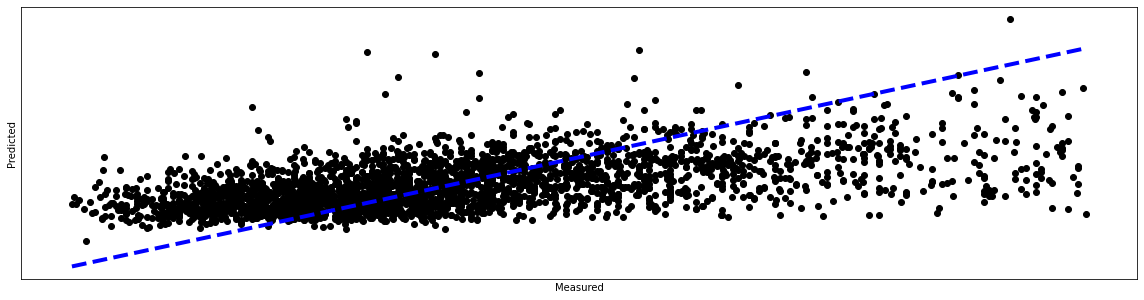

In [21]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

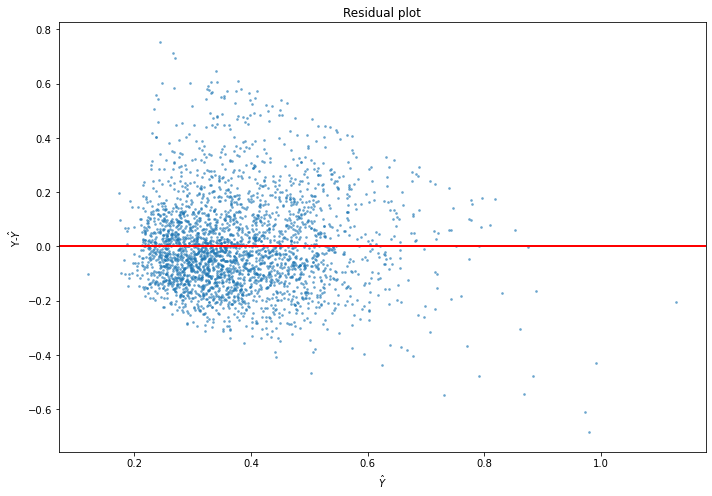

In [22]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [23]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr.pkl')

['regr.pkl']

# HOMEWORK 1

### 6. Train Test Split

Variance score: 0.27
Mean Squred Error: 0.03


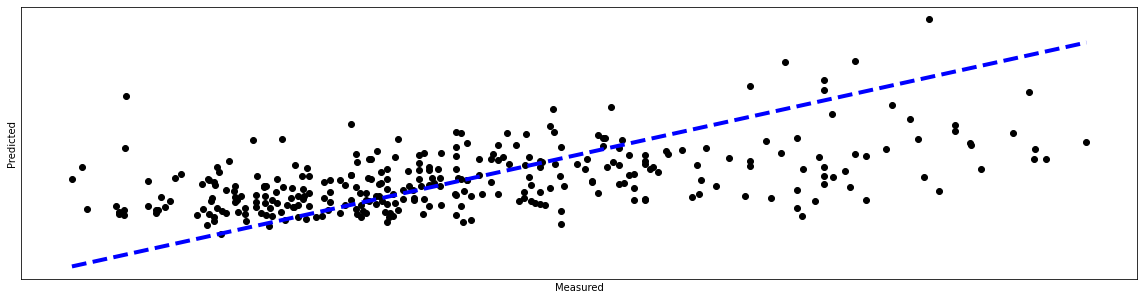

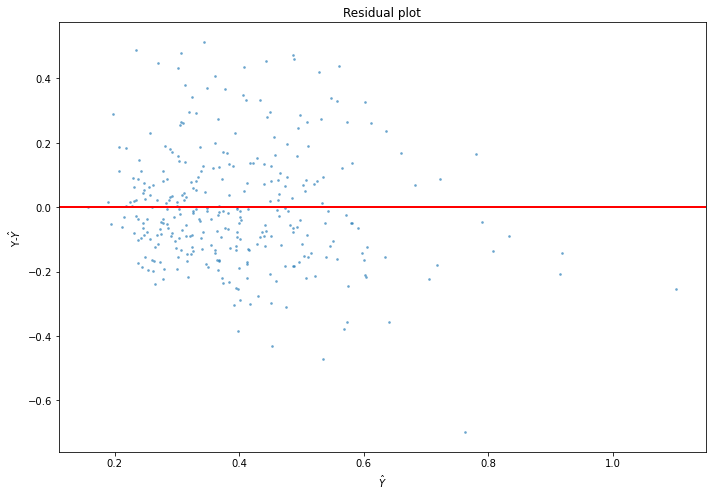

['linear-regr.pkl']

In [24]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Init x, y test,train @ 33% size (sklearn)
X = features_train
y = label_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=839)

# Determine linear_model (sklearn - above))
regr = linear_model.LinearRegression()

# Train linear_model (sklearn)
regr.fit(X_train, y_train)

y_predict = regr.predict(X_test)

# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
print('Variance score: %.2f' % r2_score(y_test, y_predict))
print('Mean Squred Error: %.2f' % mean_squared_error(y_test, y_predict))
# Score Method 2 (sklearn)


# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_predict, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()
# Residual plot

plt.figure(figsize=(10, 7))

resid = y_test - regr.predict(X_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=y_predict, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

# Download model as pkl file
joblib.dump(regr, 'linear-regr.pkl')

### 7. Decision Tree

Variance score: -0.12
Mean Squred Error: 0.05


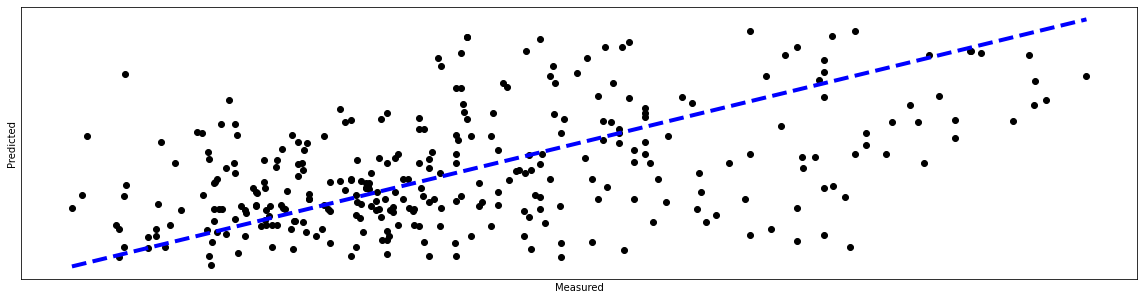

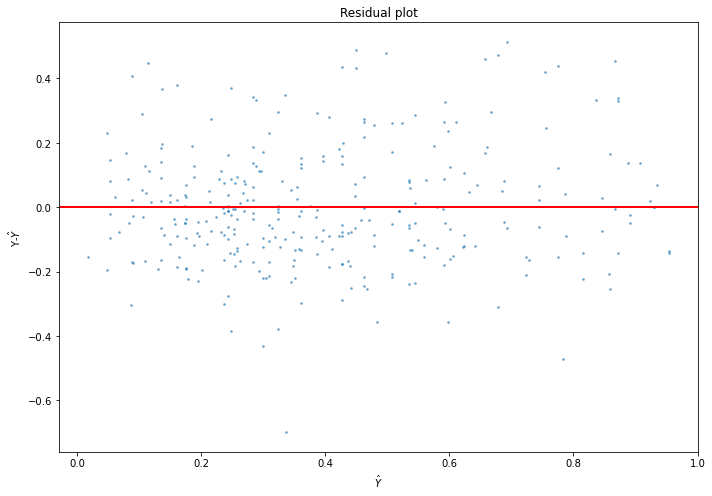

['decision-tree.pkl']

In [25]:
# YOUR TURN
# Run DecisionTreeRegressor
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
# Create regressor
regressor = DecisionTreeRegressor(random_state=0)

# Fit
regressor.fit(X_train, y_train)

# Predictions
y_predict = regressor.predict(X_test)

# Score
print('Variance score: %.2f' % r2_score(y_test, y_predict))
print('Mean Squred Error: %.2f' % mean_squared_error(y_test, y_predict))

# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_predict, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()
# Residual plot

plt.figure(figsize=(10, 7))

resid = y_test - regr.predict(X_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=y_predict, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

# Download model as pkl file
joblib.dump(regr, 'decision-tree.pkl')

### 8. SGD

Variance score: 0.27
Mean Squred Error: 0.03


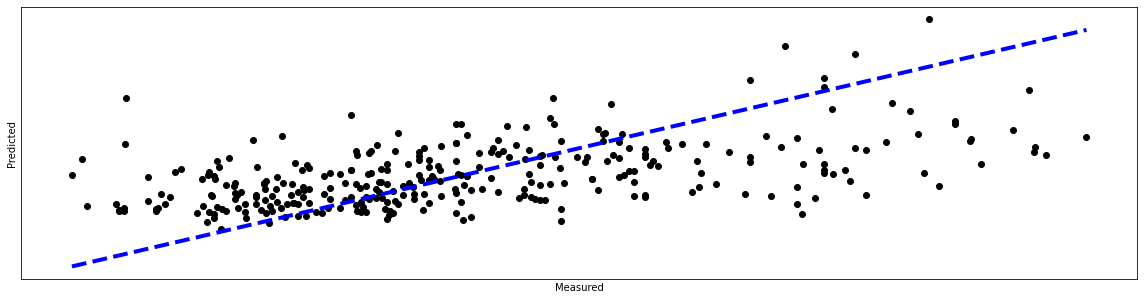

['sgd.pkl']

In [26]:
# YOUR TURN
# Run SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create regressor
regr = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Fit
regr.fit(X_train, y_train['SOLDPRICE'])

# Predictions
y_predict = regr.predict(X_test)

# Score
print('Variance score: %.2f' % r2_score(y_test, y_predict))
print('Mean Squred Error: %.2f' % mean_squared_error(y_test, y_predict))

# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_predict, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

# Download model as pkl file
joblib.dump(regr, 'sgd.pkl')

### 9. KNN

Variance score: 0.26
Mean Squred Error: 0.03


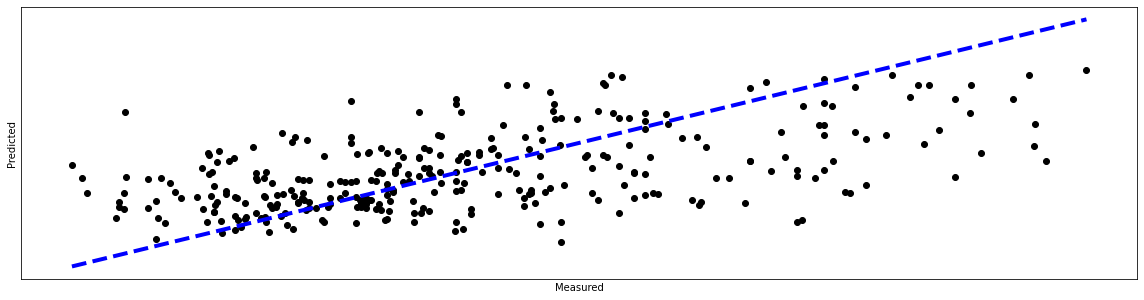

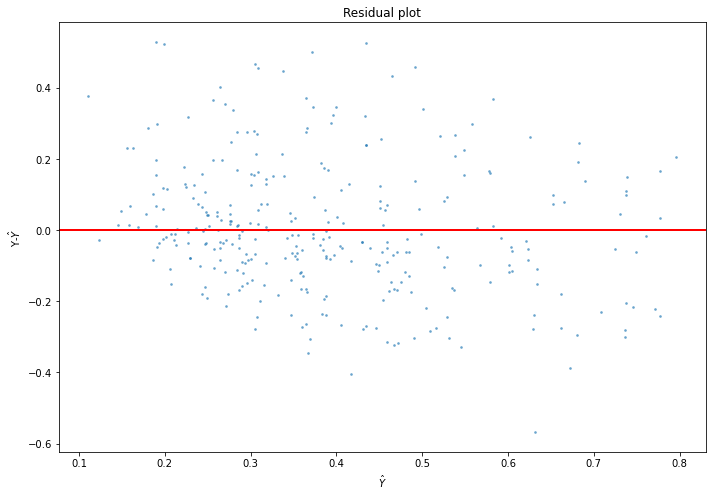

['knn.pkl']

In [27]:
# YOUR TURN
# Run KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor


# Create regressor
regr = KNeighborsRegressor(n_neighbors=5)

# Fit
regr.fit(X_train, y_train)

# Predictions
y_predict = regr.predict(X_test)

# Score
print('Variance score: %.2f' % r2_score(y_test, y_predict))
print('Mean Squred Error: %.2f' % mean_squared_error(y_test, y_predict))

# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_predict, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

# Residual plot

plt.figure(figsize=(10, 7))

resid = y_test - regr.predict(X_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=y_predict, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

# Download model as pkl file
joblib.dump(regr, 'knn.pkl')

### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame